In [31]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning

#and here is our data directiory
data_folder = '../../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Objective

### In order to find which factors contribute to property value, we will look at the correlation between different nuisances like airport noise or power lines.

## Airport Noise

In [32]:
sales = pd.read_csv(data_folder+'EXTR_RPSale_2019.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
parcels = pd.read_csv(data_folder+'EXTR_Parcel_2019.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})

In [33]:
sales.info()

parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          42680 non-null  int64 
 1   ExciseTaxNbr        42680 non-null  int64 
 2   Major               42680 non-null  string
 3   Minor               42680 non-null  string
 4   DocumentDate        42680 non-null  object
 5   SalePrice           42680 non-null  int64 
 6   RecordingNbr        42680 non-null  object
 7   Volume              42680 non-null  object
 8   Page                42680 non-null  object
 9   PlatNbr             42680 non-null  object
 10  PlatType            42680 non-null  object
 11  PlatLot             42680 non-null  object
 12  PlatBlock           42680 non-null  object
 13  SellerName          42680 non-null  object
 14  BuyerName           42680 non-null  object
 15  PropertyType        42680 non-null  int64 
 16  PrincipalUse        42

In [34]:
sales_PINs = sales.loc[:, ['SalePrice', 'PIN']]
air_noise_PINs = parcels.loc[:,['AirportNoise', 'PIN']]

sales_vs_air_noise = pd.merge(sales_PINs, air_noise_PINs, on='PIN', how='inner')

In [38]:
sales_vs_air_noise

,SalePrice,PIN,AirportNoise
0,560000,2130430120,0
1,435000,9406520630,0
2,450000,1402810020,0
3,0,7797900030,0
4,193000,1245500098,0
...,...,...,...
42675,442000,4059400095,0
42676,680000,3816700025,0
42677,745000,6150200505,0
42678,0,3023000320,0


#### Let's check out the distribution of our data

/home/max/anaconda3/envs/housing/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


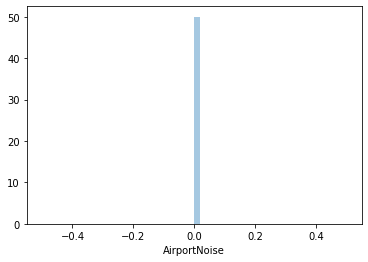

In [43]:
sns.distplot(sales_vs_air_noise.AirportNoise)

Looks like there aren't any properties with airport noise in this dataset. Let's checkout the spread of the data in the original parcels data.

/home/max/anaconda3/envs/housing/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


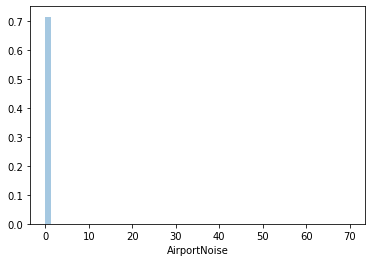

In [47]:
orig_parcels = pd.read_csv(data_folder+'EXTR_Parcel.csv', dtype={'Major': 'string', 'Minor':'string'}, encoding='iso8859_14')
sns.distplot(orig_parcels.AirportNoise)

looks like there's no airport noise in the data we have. Let's check traffic noise.

/home/max/anaconda3/envs/housing/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


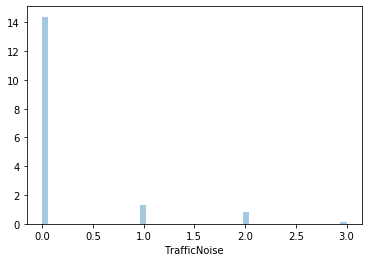

In [48]:
sns.distplot(orig_parcels.TrafficNoise)

Looks like there's a little data in the original dataset, let's see how ours compares

In [49]:
traffic_noise_PINs = parcels.loc[:,['TrafficNoise', 'PIN']]

sales_vs_traffic_noise = pd.merge(sales_PINs, traffic_noise_PINs, on='PIN', how='inner')

/home/max/anaconda3/envs/housing/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


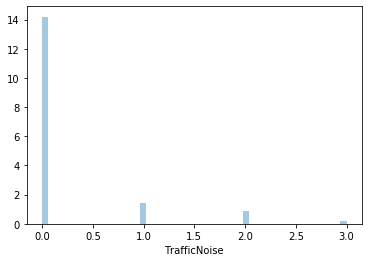

In [50]:
sns.distplot(sales_vs_traffic_noise.TrafficNoise)

In [51]:
sales_vs_traffic_noise.corr()

,SalePrice,TrafficNoise
SalePrice,1.000000,-0.020214
TrafficNoise,-0.020214,1.000000
